In [ ]:
# import all regressor/sklearn modules
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from sklearn import set_config
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
import pandas as pd
import numpy as np
from pandas import DataFrame, read_csv
import tabulate
import seaborn as sns
from math import sqrt

There are 9 features in this dataset currently, brand

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# DATA VISUALIZATION

In [ ]:
url='https://drive.google.com/file/d/1Jb50E44Drvdvmy1mKiTRDDlMxYZ_v8JT/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
data = read_csv(url)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


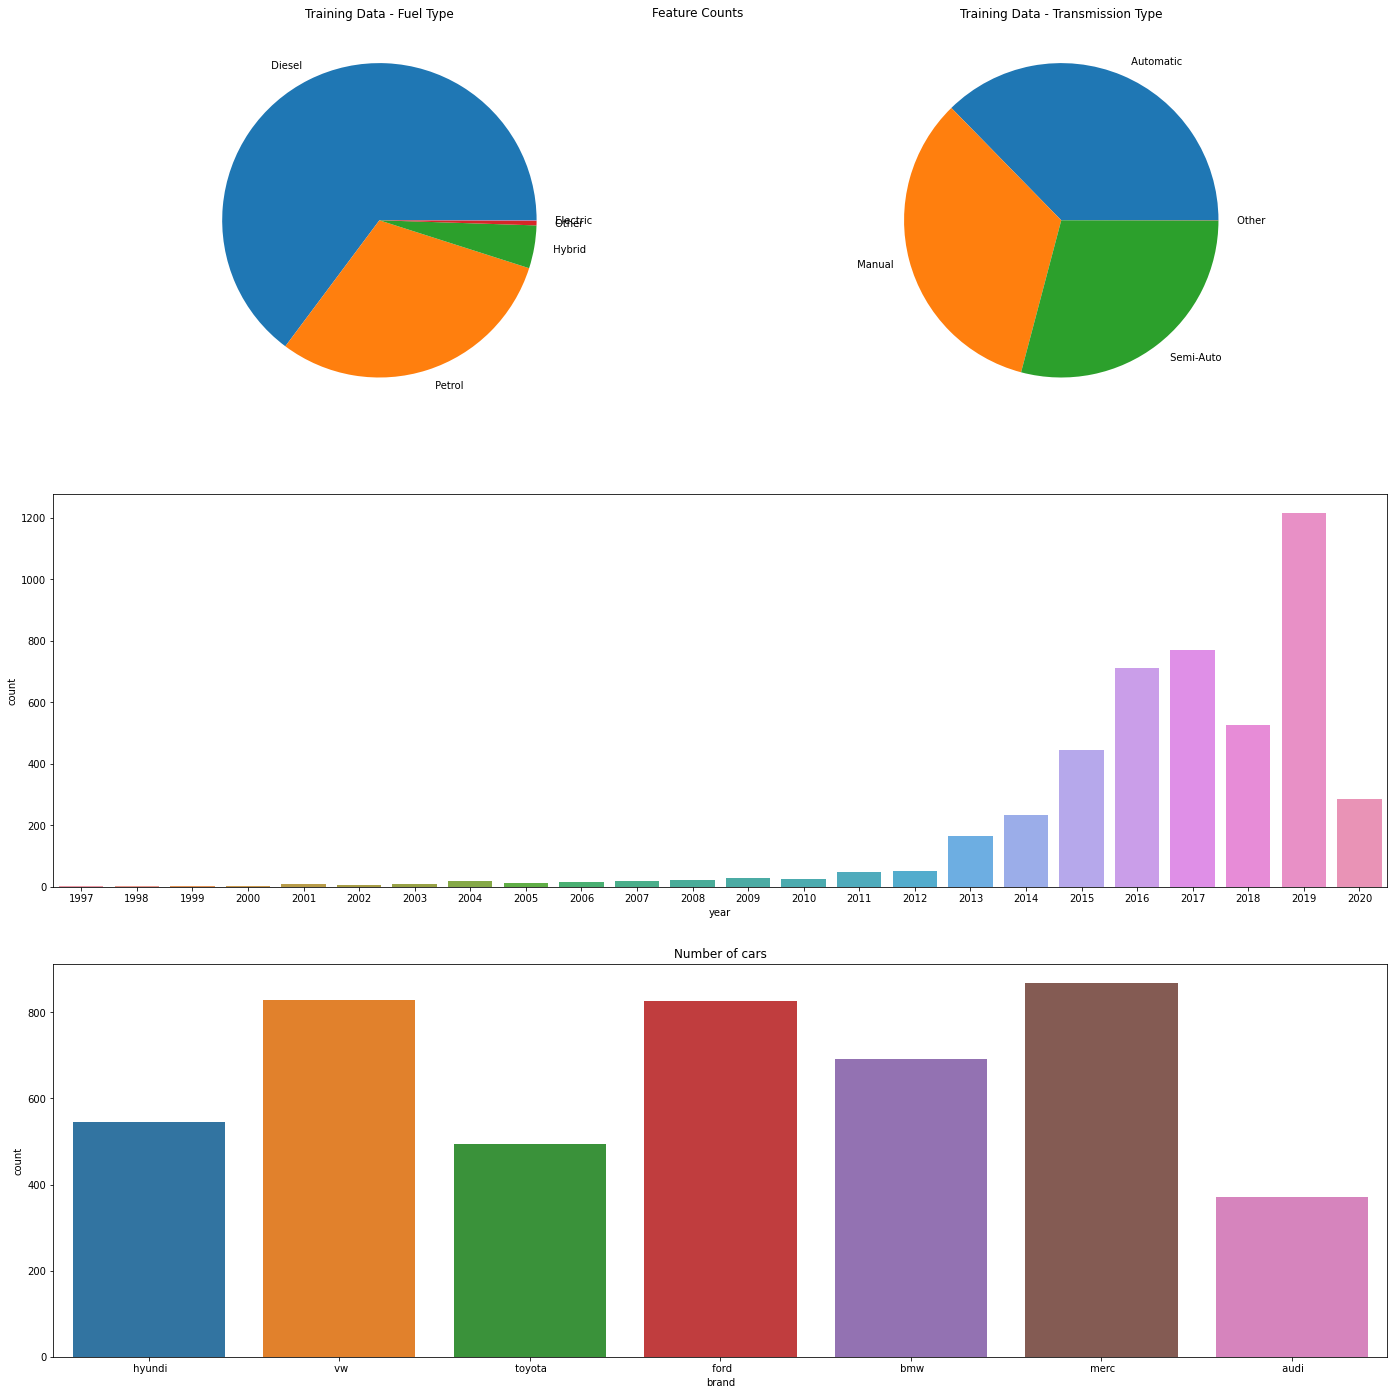

In [ ]:
features_fig = plt.figure(1, figsize=(20,20))
features_fig.suptitle("Feature Counts")

ax = plt.subplot(3, 2, 1)
ax.set_title("Training Data - Fuel Type")
data["fuelType"].value_counts().plot(kind='pie', ylabel='')

ax = plt.subplot(3, 2, 2)
ax.set_title("Training Data - Transmission Type")
data["transmission"].value_counts().plot(kind='pie', ylabel='')

ax = plt.subplot(3, 1, 2)
ax.set_title("")
sns.countplot(data["year"], x="Year Manufactured")

ax = plt.subplot(3, 1, 3)
ax.set_title("Number of cars")
sns.countplot(data["brand"],label="brand")

features_fig.tight_layout(pad=3.0)

Text(0.5, 1.0, 'Price Correlation')

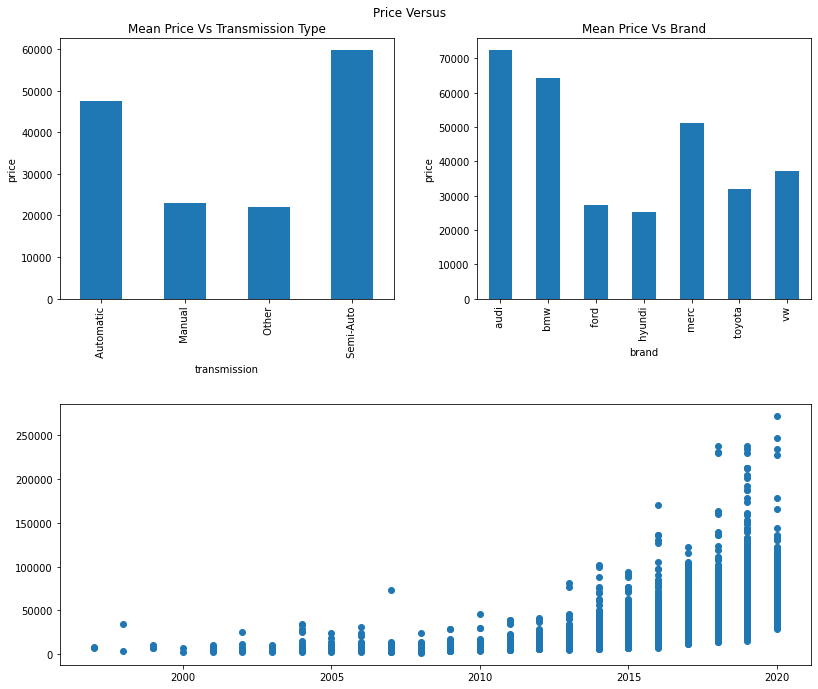

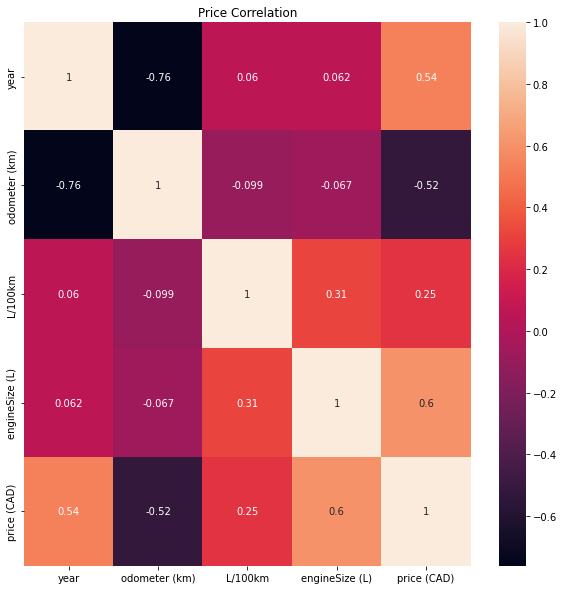

In [ ]:
price_vs_fig = plt.figure(2, figsize=(12,10))
price_vs_fig.suptitle("Price Versus")

ax = plt.subplot(2, 2, 1)
ax.set_title("Mean Price Vs Transmission Type")
data.groupby("transmission")["price (CAD)"].mean().plot(ylabel='price', kind='bar')

ax = plt.subplot(2, 2, 2)
ax.set_title("Mean Price Vs Brand")
data.groupby("brand")["price (CAD)"].mean().plot(ylabel='price', kind='bar')

plt.subplot(2, 1, 2)
plt.scatter(data["year"], data["price (CAD)"])
price_vs_fig.tight_layout(pad=3.0)

figheat=plt.figure(4,figsize=(10,10))
ax = plt.axes()
sns.heatmap(data.iloc[:,[1,2,3,4,6,7,9,10,12]].corr(),annot=True, ax=ax)
ax.set_title('Price Correlation')


# BASELINE MODEL (initial idea)

Get the average price of each brand. That will act as our baseline.

If brand is not recognized, or not specified, then will use the average of all of the cars.

In [ ]:
######## START OF BASELINE ##########

baseline_url='https://drive.google.com/file/d/1Jb50E44Drvdvmy1mKiTRDDlMxYZ_v8JT/view?usp=sharing'
baseline_url='https://drive.google.com/uc?id=' + baseline_url.split('/')[-2]
baseline_data = read_csv(baseline_url)


In [ ]:
baseline_data

,carID,brand,model,year,transmission,mileage (mi),odometer (km),fuelType,mpg (mi),L/100km,engineSize (L),price (£),price (CAD)
0,12002,hyundi,Santa Fe,2017,Semi-Auto,32467,52250,Diesel,42.8,5.50,2.2,18991,32284.7
1,12003,vw,Arteon,2019,Automatic,1555,2503,Petrol,40.4,5.82,1.5,22500,38250.0
2,12005,toyota,Verso,2003,Automatic,104000,167371,Petrol,34.5,6.82,1.8,2395,4071.5
3,12006,ford,Grand C-MAX,2018,Manual,5113,8229,Petrol,47.9,4.91,1.0,14000,23800.0
4,12007,bmw,X6,2019,Automatic,9010,14500,Diesel,34.9,6.74,3.0,58700,99790.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4622,19616,ford,Galaxy,2017,Manual,40206,64705,Diesel,56.5,4.16,2.0,19200,32640.0
4623,19618,audi,A7,2015,Semi-Auto,21100,33957,Petrol,29.7,7.92,4.0,28990,49283.0
4624,19620,merc,CLS Class,2015,Automatic,60972,98125,Diesel,52.3,4.50,3.0,17450,29665.0
4625,19626,ford,Puma,2020,Manual,4111,6616,Petrol,50.4,4.67,1.0,21995,37391.5


In [ ]:
car_brands = baseline_data["brand"].unique()
print("The possible 'brand' values are:")
for value in car_brands:
  print(value)

The possible 'brand' values are:
 hyundi
 vw
 toyota
 ford
 bmw
 merc
 audi


In [ ]:
baseline_avgs = baseline_data.groupby(['brand'])['price (CAD)'].mean().round(2)
unknown_brand_avg = round(baseline_data['price (CAD)'].mean(), 2)

print(baseline_avgs.to_frame())
print(f'unknown\t {unknown_brand_avg}')

         price (CAD)
brand               
 audi       72354.51
 bmw        64228.39
 ford       27167.04
 hyundi     25152.25
 merc       51067.52
 toyota     31788.17
 vw         37049.23
unknown	 42851.59


In [ ]:
# get the r2 score for each brand

baseline_avg_np = baseline_data.groupby(['brand'])['price (CAD)'].mean().to_numpy()

truth = {}
i = 0
for brand in car_brands:
  truth[brand] = baseline_data.loc[baseline_data['brand'] == brand]['price (CAD)']
  pred = np.zeros(len(truth[brand]))
  pred.fill(baseline_avg_np[i])
  print("{} {:.2f}".format(brand, r2_score(truth[brand],pred)),"r2 score")
  i = i + 1

 hyundi -10.39 r2 score
 vw -2.07 r2 score
 toyota -0.08 r2 score
 ford -0.02 r2 score
 bmw -0.21 r2 score
 merc -0.37 r2 score
 audi -0.80 r2 score


In [ ]:
car_indexes = {
  "audi": "0",
  "bmw": "1",
  "ford": "2",
  "hyundi": "3",
  "merc": "4",
  "toyota": "5",
  "vw": "6"
}

In [ ]:
# instead of using the average price of each brand, just use the average price of all the cars as the prediction value

x_baseline = baseline_data.iloc[:4627, 1:11]
y_baseline = baseline_data[['price (CAD)']]

In [ ]:
y_baseline

,price (CAD)
0,32284.7
1,38250.0
2,4071.5
3,23800.0
4,99790.0
...,...
4622,32640.0
4623,49283.0
4624,29665.0
4625,37391.5


In [ ]:
price = baseline_data.groupby(['price (CAD)'])['price (CAD)'].mean().to_numpy()
average = np.average(price)

In [ ]:
y_baseline_pred = [average]*4627
print("{}".format(100*mean_absolute_percentage_error(y_baseline, y_baseline_pred)), "%, MAPE")
print("{}".format(round(sqrt(mean_squared_error(y_baseline, y_baseline_pred)), 4)), "- RMSE")
print("{:.2f}".format(r2_score(y_baseline,y_baseline_pred)),"r2 score")

101.34434896809947 %, MAPE
29366.6819 - RMSE
-0.02 r2 score


In [ ]:
# ^ Expect 0.00 r2 score as r2 score is calculated with regards to average

In [ ]:
######## END OF BASELINE ##########

# DATA EXPLORATION

Visualizing the data to see if there are any obvious trends

In [ ]:
url='https://drive.google.com/file/d/1Jb50E44Drvdvmy1mKiTRDDlMxYZ_v8JT/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
train_data = read_csv(url)

In [ ]:
url = 'https://drive.google.com/file/d/1dSBzJMxPnu7rrCcwu85DQb07BMjaS4DC/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
val_data = read_csv(url)

In [ ]:
url = 'https://drive.google.com/file/d/1Sbe8eRvfuq9V89dwucfY95SICyk6Flgq/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
test_data = read_csv(url)

# SETTING UP DATA INPUTS FOR MODEL(S)

In [ ]:
url='https://drive.google.com/file/d/1Jb50E44Drvdvmy1mKiTRDDlMxYZ_v8JT/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
train_data = read_csv(url)

In [ ]:
x_train = train_data.iloc[:4627, 1:11]
x_train = x_train.drop(columns = ["mileage (mi)", "mpg (mi)"])
x_train

,brand,model,year,transmission,odometer (km),fuelType,L/100km,engineSize (L)
0,hyundi,Santa Fe,2017,Semi-Auto,52250,Diesel,5.50,2.2
1,vw,Arteon,2019,Automatic,2503,Petrol,5.82,1.5
2,toyota,Verso,2003,Automatic,167371,Petrol,6.82,1.8
3,ford,Grand C-MAX,2018,Manual,8229,Petrol,4.91,1.0
4,bmw,X6,2019,Automatic,14500,Diesel,6.74,3.0
...,...,...,...,...,...,...,...,...
4622,ford,Galaxy,2017,Manual,64705,Diesel,4.16,2.0
4623,audi,A7,2015,Semi-Auto,33957,Petrol,7.92,4.0
4624,merc,CLS Class,2015,Automatic,98125,Diesel,4.50,3.0
4625,ford,Puma,2020,Manual,6616,Petrol,4.67,1.0


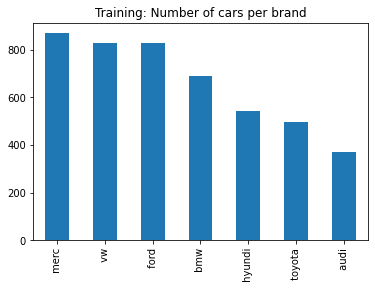

In [ ]:
train_data['brand'].value_counts().plot(x='Brand', y='Number of cars', kind='bar', title='Training: Number of cars per brand')

In [ ]:
y_train = train_data[['price (CAD)']]
y_train

,price (CAD)
0,32284.7
1,38250.0
2,4071.5
3,23800.0
4,99790.0
...,...
4622,32640.0
4623,49283.0
4624,29665.0
4625,37391.5


In [ ]:
url = 'https://drive.google.com/file/d/1dSBzJMxPnu7rrCcwu85DQb07BMjaS4DC/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
val_data = read_csv(url)

In [ ]:
x_val = val_data.iloc[:991, 1:11]
x_val = x_val.drop(columns = ["mileage (mi)", "mpg (mi)"])
x_val

,brand,model,year,transmission,odometer (km),fuelType,L/100km,engineSize (L)
0,audi,A8,2020,Automatic,16,Diesel,6.00,3.0
1,audi,RS6,2017,Automatic,30386,Petrol,8.00,4.0
2,audi,Q8,2019,Semi-Auto,4928,Diesel,7.00,3.0
3,audi,A7,2017,Automatic,63262,Diesel,4.50,3.0
4,audi,A7,2017,Semi-Auto,39577,Diesel,4.50,3.0
...,...,...,...,...,...,...,...,...
986,vw,Arteon,2019,Automatic,17191,Petrol,4.99,2.0
987,vw,Amarok,2018,Automatic,20031,Diesel,6.50,3.0
988,vw,Arteon,2019,Semi-Auto,12875,Diesel,5.33,2.0
989,vw,Tiguan Allspace,2020,Semi-Auto,6259,Diesel,6.08,2.0


In [ ]:
y_val = val_data[['price (CAD)']]
y_val

,price (CAD)
0,93483.0
1,104533.0
2,84983.0
3,41633.0
4,43180.0
...,...
986,48264.7
987,43346.6
988,57715.0
989,63733.0


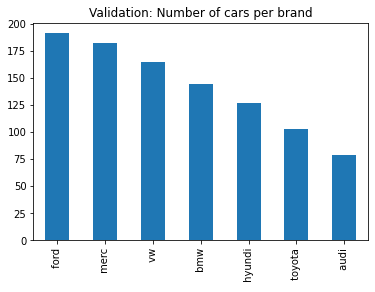

In [ ]:
val_data['brand'].value_counts().plot(x='Brand', y='Number of cars', kind='bar', title='Validation: Number of cars per brand')

In [ ]:
url = 'https://drive.google.com/file/d/1Sbe8eRvfuq9V89dwucfY95SICyk6Flgq/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
test_data = read_csv(url)

In [ ]:
x_test = test_data.iloc[:991, 1:11]
x_test = x_test.drop(columns = ["mileage (mi)", "mpg (mi)"])
x_test

,brand,model,year,transmission,odometer (km),fuelType,L/100km,engineSize (L)
0,merc,GLS Class,2017,Automatic,19386,Diesel,6.32,3.0
1,vw,Amarok,2017,Automatic,60645,Diesel,6.50,3.0
2,merc,GLS Class,2019,Automatic,16093,Diesel,6.92,3.0
3,audi,RS6,2015,Semi-Auto,33767,Petrol,8.00,4.0
4,merc,GL Class,2016,Manual,43145,Diesel,3.50,2.1
...,...,...,...,...,...,...,...,...
986,vw,Beetle,2007,Manual,143231,Petrol,6.41,1.6
987,bmw,Z4,2020,Semi-Auto,163,Petrol,6.32,2.0
988,toyota,Avensis,2018,Automatic,33778,Petrol,4.99,1.8
989,hyundi,I800,2017,Manual,46832,Diesel,6.24,2.5


In [ ]:
y_test = test_data[['price (CAD)']]
y_test

,price (CAD)
0,64600.0
1,39941.5
2,101998.3
3,78200.0
4,26688.3
...,...
986,3901.5
987,59483.0
988,28041.5
989,25120.9


# START OF BASELINE MODEL

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohenc = OneHotEncoder(handle_unknown='ignore')
ohenc.fit(x_train)

OneHotEncoder(handle_unknown='ignore')

In [ ]:
x_train_f = ohenc.transform(x_train).toarray()
x_val_f = ohenc.transform(x_val).toarray()
x_test_f = ohenc.transform(x_test).toarray()

In [ ]:
dRegr = DecisionTreeRegressor(random_state = 40)
dRegr.fit(x_train_f, y_train)

DecisionTreeRegressor(random_state=40)

In [ ]:
print(f"Training Coefficient of Determination of DecisionTreeRegressor: {round(r2_score(y_train, dRegr.predict(x_train_f)), 4)}")
print(f"Training Root Mean Squared Error of DecisionTreeRegressor: {round(sqrt(mean_squared_error(y_train, dRegr.predict(x_train_f))), 4)}")
print(f"Training Mean Absolute Percentage Error of DecisionTreeRegressor: {100*round(mean_absolute_percentage_error(y_train, dRegr.predict(x_train_f)), 4)} %")

Training Coefficient of Determination of DecisionTreeRegressor: 0.9998
Training Root Mean Squared Error of DecisionTreeRegressor: 434.5156
Training Mean Absolute Percentage Error of DecisionTreeRegressor: 0.1 %


In [ ]:
print(f"Validation Coefficient of Determination of DecisionTreeRegressor: {round(r2_score(y_val, dRegr.predict(x_val_f)), 4)}")
print(f"Validation Root Mean Squared Error of DecisionTreeRegressor: {round(sqrt(mean_squared_error(y_val, dRegr.predict(x_val_f))), 4)}")
print(f"Validation Mean Absolute Percentage Error of DecisionTreeRegressor: {100*round(mean_absolute_percentage_error(y_val, dRegr.predict(x_val_f)), 4)} %")

Validation Coefficient of Determination of DecisionTreeRegressor: 0.9354
Validation Root Mean Squared Error of DecisionTreeRegressor: 7221.2263
Validation Mean Absolute Percentage Error of DecisionTreeRegressor: 11.940000000000001 %


In [ ]:
# Decision Tree Regression is giving out very good results, 0.9998 r2 score on training versus 0.9327 r2 score on validation (may be a sign of slight overfit)

# COMPARISON OF DIFFERENT REGRESSION MODELS

In [ ]:
linRegr = LinearRegression().fit(x_train_f,y_train)

In [ ]:
print(f"Training Coefficient of Determination of LinearRegressor: {round(r2_score(y_train, linRegr.predict(x_train_f)), 4)}")
print(f"Training Root Mean Squared Error of LinearRegressor: {round(sqrt(mean_squared_error(y_train, linRegr.predict(x_train_f))), 4)}")
print(f"Training Mean Absolute Percentage Error of LinearRegressor: {100*round(mean_absolute_percentage_error(y_train, linRegr.predict(x_train_f)), 4)} %")

Training Coefficient of Determination of LinearRegressor: 0.988
Training Root Mean Squared Error of LinearRegressor: 3185.6163
Training Mean Absolute Percentage Error of LinearRegressor: 4.04 %


In [ ]:
print(f"Validation Coefficient of Determination of LinearRegressor: {round(r2_score(y_val, linRegr.predict(x_val_f)), 4)}")
print(f"Validation Root Mean Squared Error of LinearRegressor: {round(sqrt(mean_squared_error(y_val, linRegr.predict(x_val_f))), 4)}")
print(f"Validation Mean Absolute Percentage Error of LinearRegressor: {100*round(mean_absolute_percentage_error(y_val, linRegr.predict(x_val_f)), 4)} %")

Validation Coefficient of Determination of LinearRegressor: -3.9677853194996454e+18
Validation Root Mean Squared Error of LinearRegressor: 56611003536012.22
Validation Mean Absolute Percentage Error of LinearRegressor: 45977942846.23 %


In [ ]:
# Linear Regression has severe overfitting, -10e+22 r2 score on validation

In [ ]:
regr = RandomForestRegressor(n_estimators=1000, criterion = "squared_error", max_depth = None, min_samples_split=2, min_samples_leaf=1, max_features="auto", random_state = 40)
regr.fit(x_train_f, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(n_estimators=1000, random_state=40)

In [ ]:
y_train_p = regr.predict(x_train_f)
print(f"Training Coefficient of Determination of RandomForestRegressor: {round(regr.score(x_train_f, y_train), 4)}")
print(f"Training Root Mean Squared Error of RandomForestRegressor: {round(sqrt(mean_squared_error(y_train, y_train_p)), 4)}")
print(f"Training Mean Absolute Percentage Error of RandomForestRegressor: {100*round(mean_absolute_percentage_error(y_train, y_train_p), 4)} %")

Training Coefficient of Determination of RandomForestRegressor: 0.9902
Training Root Mean Squared Error of RandomForestRegressor: 2868.4755
Training Mean Absolute Percentage Error of RandomForestRegressor: 4.03 %


In [ ]:
y_val_p = regr.predict(x_val_f)
print(f"Validation Coefficient of Determination of RandomForestRegressor: {round(regr.score(x_val_f, y_val), 4)}")
print(f"Validation Root Mean Squared Error of RandomForestRegressor: {round(sqrt(mean_squared_error(y_val, y_val_p)), 4)}")
print(f"Validation Mean Absolute Percentage Error of RandomForestRegressor: {100*round(mean_absolute_percentage_error(y_val, y_val_p), 4)} %")

Validation Coefficient of Determination of RandomForestRegressor: 0.9465
Validation Root Mean Squared Error of RandomForestRegressor: 6572.2465
Validation Mean Absolute Percentage Error of RandomForestRegressor: 11.25 %


In [ ]:
# Random Forest Regression is performing better than Decision Tree Regression

In [ ]:
voteRegr = VotingRegressor(estimators=[('rf', RandomForestRegressor(n_estimators=1000, criterion = "squared_error", random_state = 40)), ('dt', DecisionTreeRegressor(random_state = 40))])
voteRegr.fit(x_train_f, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_voting.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingRegressor(estimators=[('rf',
                             RandomForestRegressor(n_estimators=1000,
                                                   random_state=40)),
                            ('dt', DecisionTreeRegressor(random_state=40))])

In [ ]:
y_train_p = voteRegr.predict(x_train_f)
print(f"Training Coefficient of Determination of VotingRegressor: {round(voteRegr.score(x_train_f, y_train), 4)}")
print(f"Training Root Mean Squared Error of VotingRegressor: {round(sqrt(mean_squared_error(y_train, y_train_p)), 4)}")
print(f"Training Mean Absolute Percentage Error of VotingRegressor: {100*round(mean_absolute_percentage_error(y_train, y_train_p), 4)} %")

Training Coefficient of Determination of VotingRegressor: 0.9974
Training Root Mean Squared Error of VotingRegressor: 1482.7814
Training Mean Absolute Percentage Error of VotingRegressor: 2.07 %


In [ ]:
y_val_p = voteRegr.predict(x_val_f)
print(f"Validation Coefficient of Determination of VotingRegressor: {round(voteRegr.score(x_val_f, y_val), 4)}")
print(f"Training Root Mean Squared Error of VotingRegressor: {round(sqrt(mean_squared_error(y_val, y_val_p)), 4)}")
print(f"Training Mean Absolute Percentage Error of VotingRegressor: {100*round(mean_absolute_percentage_error(y_val, y_val_p), 4)} %")

Validation Coefficient of Determination of VotingRegressor: 0.9463
Training Root Mean Squared Error of VotingRegressor: 6585.3518
Training Mean Absolute Percentage Error of VotingRegressor: 11.25 %


In [ ]:
# Voting Regressor is a system which uses multiple regressor models - performs worse than Random Forest by itself

In [ ]:
regr = RandomForestRegressor(n_estimators=1000, criterion = "squared_error", max_depth = None, min_samples_split=2, min_samples_leaf=1, max_features="auto", random_state = 40)
regr.fit(x_train_f, y_train)

Model we decided to use in the end was the Random Forest Regression model

# TESTING FINAL MODEL

In [ ]:
x_test_data = x_test[0:5]
x_test_data

,brand,model,year,transmission,odometer (km),fuelType,L/100km,engineSize (L)
0,merc,GLS Class,2017,Automatic,19386,Diesel,6.32,3.0
1,vw,Amarok,2017,Automatic,60645,Diesel,6.50,3.0
2,merc,GLS Class,2019,Automatic,16093,Diesel,6.92,3.0
3,audi,RS6,2015,Semi-Auto,33767,Petrol,8.00,4.0
4,merc,GL Class,2016,Manual,43145,Diesel,3.50,2.1


In [ ]:
y_test_data = y_test[0:5]
y_test_data

,price (CAD)
0,64600.0
1,39941.5
2,101998.3
3,78200.0
4,26688.3


In [ ]:
x_point_data = x_test_f[0:5]
x_point_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y_point_data = regr.predict(x_point_data)

df = pd.DataFrame(y_point_data, columns = ["predicted price (CAD)"]).round(1)
frames = [y_test_data,df]

df = pd.concat(frames, axis = 1)
df

,price (CAD),predicted price (CAD)
0,64600.0,65291.3
1,39941.5,42544.6
2,101998.3,90582.2
3,78200.0,79258.6
4,26688.3,26790.7


In [ ]:
y_test_p = regr.predict(x_test_f)
print(f"Test Coefficient of Determination of RandomForestRegressor: {round(regr.score(x_test_f, y_test), 4)}")
print(f"Test Root Mean Squared Error of RandomForestRegressor: {round(sqrt(mean_squared_error(y_test, y_test_p)), 4)}")
print(f"Test Mean Absolute Percentage Error of RandomForestRegressor: {100*round(mean_absolute_percentage_error(y_test, y_test_p), 4)} %")

Test Coefficient of Determination of RandomForestRegressor: 0.938
Test Root Mean Squared Error of RandomForestRegressor: 7244.3389
Test Mean Absolute Percentage Error of RandomForestRegressor: 10.22 %
